            Player  Age  Weekly_Salary               Club
0     Darwin Nunez   19         144009          Liverpool
1       Matty Cash   18         311444        Aston Villa
2       Ivan Toney   27          81446          Brentford
3  Mohammed Salisu   29          42150        Southampton
4    Kobbie Mainoo   21         145209  Manchester United
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player         200 non-null    object
 1   Age            200 non-null    int64 
 2   Weekly_Salary  200 non-null    int64 
 3   Club           200 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.4+ KB
None


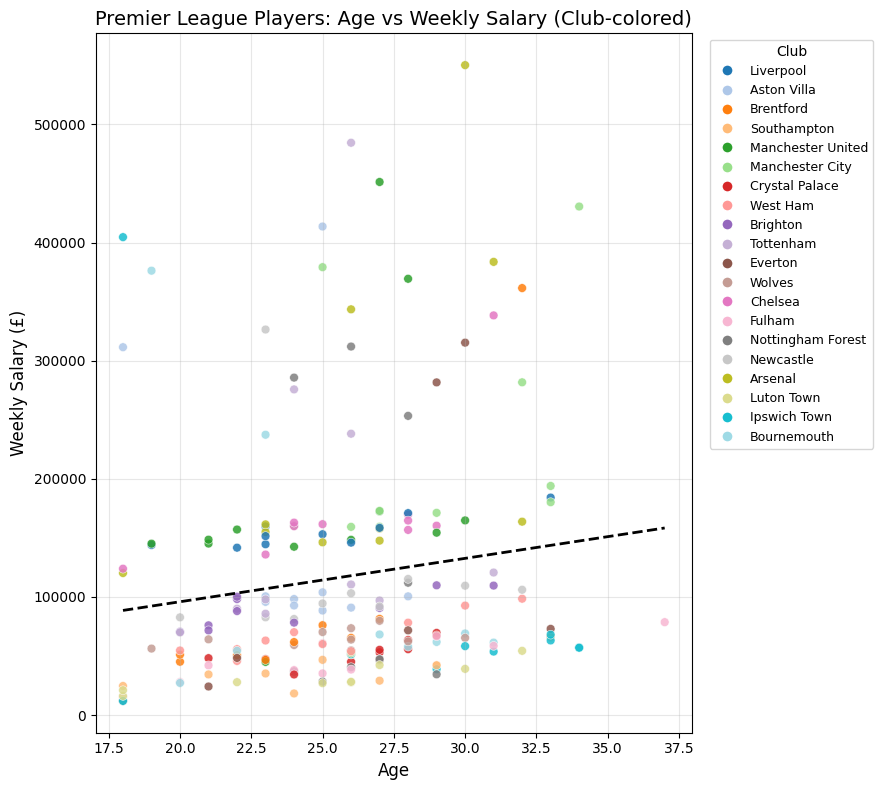

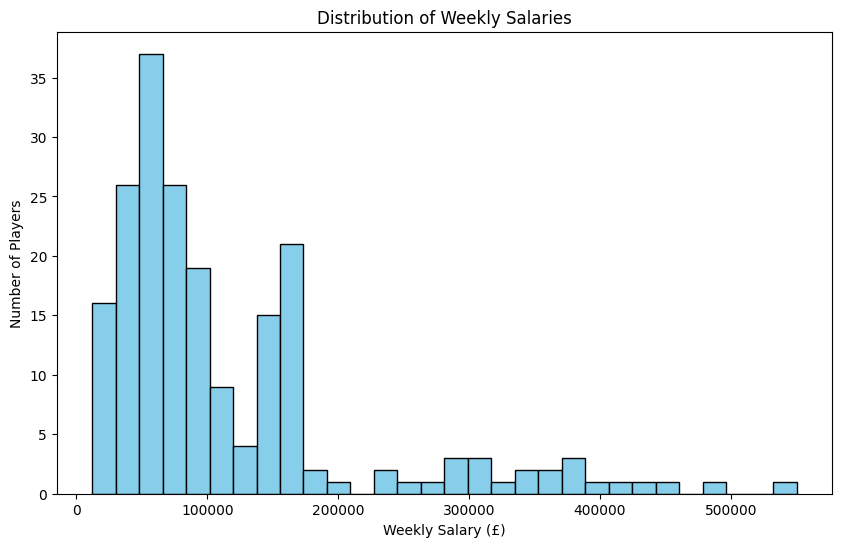

<Figure size 1000x600 with 0 Axes>

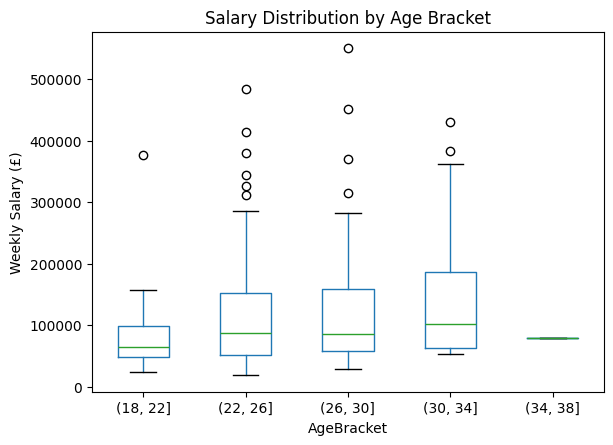

In [1]:
# Premier League Age vs Salary Visualization Notebook

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Step 2: Load dataset
df = pd.read_csv('premier_league_realnames_ages_salaries.csv')

# Step 3: Quick overview
print(df.head())
print(df.info())

# Step 4: Scatter plot colored by Club
plt.figure(figsize=(12,8))
clubs_unique = df['Club'].unique().tolist()
cmap = plt.get_cmap('tab20')
color_map = {club: cmap(i % 20) for i, club in enumerate(clubs_unique)}
colors = df['Club'].map(color_map)

plt.scatter(df['Age'], df['Weekly_Salary'], c=colors, s=40, alpha=0.85, edgecolors='w', linewidth=0.4)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Weekly Salary (£)', fontsize=12)
plt.title('Premier League Players: Age vs Weekly Salary (Club-colored)', fontsize=14)
plt.grid(alpha=0.3)

# Legend
legend_elements = [Line2D([0],[0], marker='o', color='w', label=club, markerfacecolor=color_map[club], markersize=8) for club in clubs_unique]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9, title='Club')

# Trendline
z = np.polyfit(df['Age'], df['Weekly_Salary'], 1)
p = np.poly1d(z)
ages_sorted = np.linspace(df['Age'].min(), df['Age'].max(), 100)
plt.plot(ages_sorted, p(ages_sorted), linestyle='--', linewidth=2, label='Trendline', color='black')

plt.tight_layout(rect=[0,0,0.75,1])
plt.show()

# Step 5: Additional EDA (optional)
# Histogram of salaries
plt.figure(figsize=(10,6))
plt.hist(df['Weekly_Salary'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Weekly Salary (£)')
plt.ylabel('Number of Players')
plt.title('Distribution of Weekly Salaries')
plt.show()

# Boxplot by age brackets
age_bins = [18,22,26,30,34,38]
df['AgeBracket'] = pd.cut(df['Age'], bins=age_bins)
plt.figure(figsize=(10,6))
df.boxplot(column='Weekly_Salary', by='AgeBracket', grid=False)
plt.ylabel('Weekly Salary (£)')
plt.title('Salary Distribution by Age Bracket')
plt.suptitle('')
plt.show()
